**Step 1** - Data Cleaning and Loading

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

# Load the dataset
df = pd.read_csv('Student_Satisfaction_Survey.csv', encoding='latin1')

# Clean the 'Average/Percentage' column to get just the decimal rating
df['Rating'] = df['Average/ Percentage'].str.split('/').str[0].astype(float)

# Display the first few rows
df.head()

,SN,Total Feedback Given,Total Configured,Questions,Weightage 1,Weightage 2,Weightage 3,Weightage 4,Weightage 5,Average/ Percentage,Course Name,Basic Course,Rating
0,1,1,12,How much of the syllabus was covered in the cl...,0,0,1,0,0,3.00 / 60.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY,3.0
1,2,1,12,How well did the teachers prepare for the clas...,0,0,0,0,1,5.00 / 100.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY,5.0
2,3,1,12,How well were the teachers able to communicate?,0,0,0,0,1,5.00 / 100.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY,5.0
3,4,1,12,The teachers approach to teaching can best be...,0,0,1,0,0,3.00 / 60.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY,3.0
4,5,1,12,Fairness of the internal evaluation process by...,0,0,0,1,0,4.00 / 80.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY,4.0


**Step 2** - Analyzing Rating


In [ ]:
# Group by question to see which areas have the highest/lowest average ratings
question_stats = df.groupby('Questions')['Rating'].mean().sort_values(ascending=False)

print("Top 3 Strengths:")
print(question_stats.head(3))

print("\nTop 3 Areas for Improvement:")
print(question_stats.tail(3))

Top 3 Strengths:
Questions
Fairness of the internal evaluation process by the teachers.    4.215517
How well were the teachers able to communicate?                 4.197241
How well did the teachers prepare for the classes?              4.090000
Name: Rating, dtype: float64

Top 3 Areas for Improvement:
Questions
The teachers identify your strengths and encourage you to provide the proper level of challenges.                     3.615172
What percentage of teachers use ICT tools such as LCD projectors, Multimedia, etc. while teaching?                    3.582759
The teaching and mentoring process in your institution facilitates you in cognitive, social and\nemotional growth.    3.577931
Name: Rating, dtype: float64


**Step 3** - Natural Language Processing(NLP)

In [ ]:
def get_sentiment_label(text):
    score = TextBlob(str(text)).sentiment.polarity
    if score > 0: return 'Positive'
    elif score < 0: return 'Negative'
    else: return 'Neutral'

# Apply NLP to the Questions column
df['Sentiment_Score'] = df['Questions'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
df['Sentiment_Label'] = df['Questions'].apply(get_sentiment_label)

# --- PRINT STATEMENTS FOR PHASE 3 ---
print("Step 3: Sentiment Analysis Results")
print(df[['Questions', 'Sentiment_Score', 'Sentiment_Label']].head(10))

print("\nSentiment Distribution Summary-")
print(df['Sentiment_Label'].value_counts())

Step 3: Sentiment Analysis Results
                                           Questions  Sentiment_Score  \
0  How much of the syllabus was covered in the cl...         0.200000   
1  How well did the teachers prepare for the clas...         0.000000   
2    How well were the teachers able to communicate?         0.500000   
3  The teachers approach to teaching can best be...         1.000000   
4  Fairness of the internal evaluation process by...         0.000000   
5  Was your performance in assignments discussed ...         0.000000   
6  The institute takes an active interest in prom...        -0.133333   
7  The teaching and mentoring process in your ins...         0.016667   
8  The institution provides multiple opportunitie...         0.000000   
9  Teachers inform you about your expected compet...        -0.100000   

  Sentiment_Label  
0        Positive  
1         Neutral  
2        Positive  
3        Positive  
4         Neutral  
5         Neutral  
6        Negative  
7

**Step 4** - Visualization

/tmp/ipython-input-2453586226.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Rating', y='Basic Course', palette='viridis')


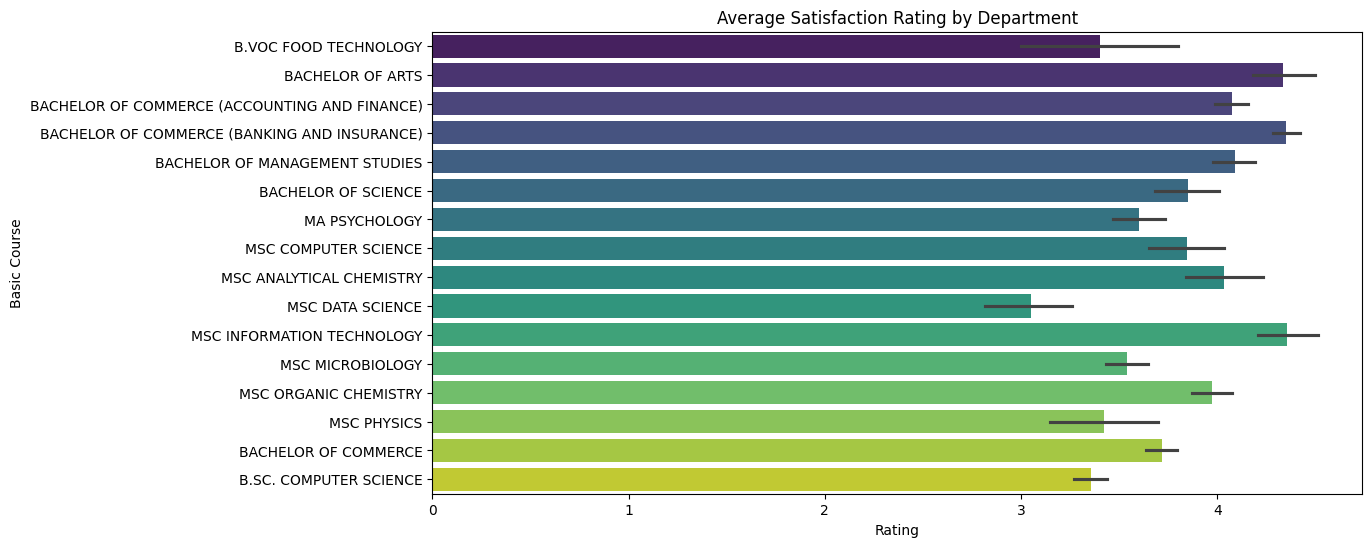

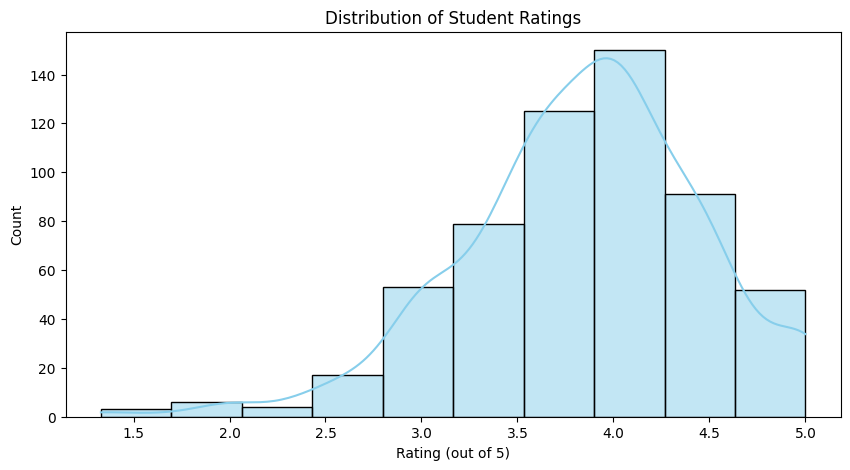

In [ ]:
# 1. Bar Chart of Ratings by Course
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Rating', y='Basic Course', palette='viridis')
plt.title('Average Satisfaction Rating by Department')
plt.show()

# 2. Distribution of Ratings
plt.figure(figsize=(10, 5))
sns.histplot(df['Rating'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Student Ratings')
plt.xlabel('Rating (out of 5)')
plt.show()